## Decision Trees and Random Forests - Machine Learning with Python

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
raw_df = pd.read_csv("weatherAUS.csv")
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
raw_df.dropna(subset = ["RainTomorrow"], inplace = True)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

<Axes: title={'center': 'No. of Rows Per Year'}, xlabel='Date', ylabel='count'>

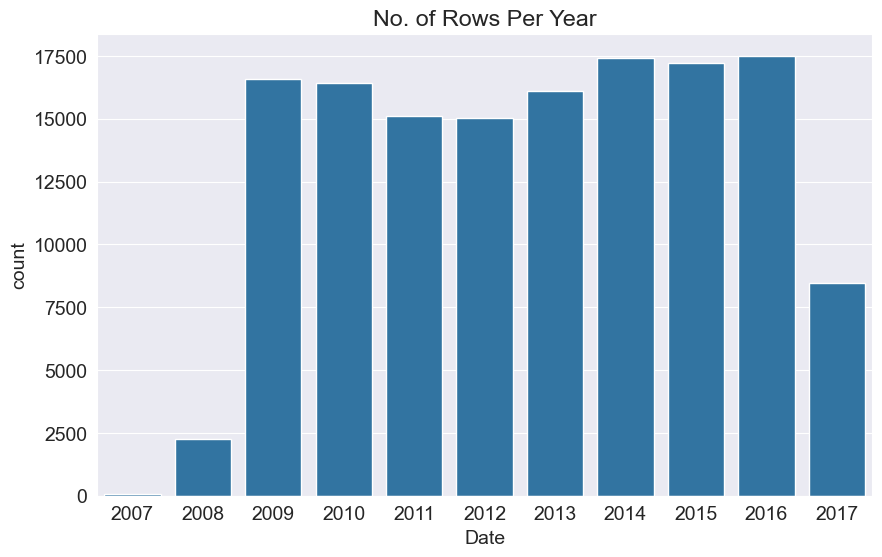

In [6]:
plt.title("No. of Rows Per Year")
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [7]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
validation_df = raw_df[year == 2015]
test_df = raw_df[year >2015]

In [8]:
print(f"train_df: {train_df.shape}")
print(f"validation_df: {validation_df.shape}")
print(f"test_df: {test_df.shape}")

train_df: (98988, 23)
validation_df: (17231, 23)
test_df: (25974, 23)


In [9]:
input_columns = list(train_df.columns)[1:-1]
target_column = "RainTomorrow"

In [10]:
train_inputs = train_df[input_columns].copy()
train_targets = train_df[target_column].copy()

In [11]:
validation_inputs = validation_df[input_columns].copy()
validation_targets = validation_df[target_column].copy()

In [12]:
test_inputs = test_df[input_columns].copy()
test_targets = test_df[target_column].copy()

In [13]:
numeric_columns = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_columns = train_inputs.select_dtypes("object").columns.tolist()

In [14]:
categorical_columns

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

## Imput Missing Values

In [15]:
train_inputs[numeric_columns].isna().sum().sort_values(ascending = False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy = "mean").fit(raw_df[numeric_columns])

In [18]:
train_inputs[numeric_columns] = imputer.transform(train_inputs[numeric_columns])
validation_inputs[numeric_columns] = imputer.transform(validation_inputs[numeric_columns])
test_inputs[numeric_columns] = imputer.transform(test_inputs[numeric_columns])

In [19]:
test_inputs[numeric_columns]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2498,20.4,37.6,0.0,5.469824,7.624853,54.0,0.0,7.0,46.0,17.0,1013.4,1009.2,7.000000,3.000000,26.1,36.7
2499,20.9,33.6,0.4,5.469824,7.624853,50.0,9.0,17.0,54.0,30.0,1011.1,1008.4,8.000000,8.000000,24.8,31.7
2500,18.4,23.1,2.2,5.469824,7.624853,48.0,11.0,39.0,62.0,67.0,1014.0,1014.8,8.000000,8.000000,21.8,19.5
2501,17.3,23.7,15.6,5.469824,7.624853,39.0,9.0,17.0,74.0,65.0,1017.9,1016.5,8.000000,8.000000,19.2,21.6
2502,15.5,22.9,6.8,5.469824,7.624853,31.0,6.0,9.0,92.0,63.0,1016.3,1013.9,8.000000,8.000000,17.2,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,5.469824,7.624853,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9
145455,2.8,23.4,0.0,5.469824,7.624853,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4
145456,3.6,25.3,0.0,5.469824,7.624853,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5
145457,5.4,26.9,0.0,5.469824,7.624853,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1


In [18]:
"""train_inputs_imputed = imputer.transform(train_inputs[numeric_columns])
train_inputs = pd.DataFrame(
    train_inputs_imputed,
    columns=numeric_columns,
    index=train_inputs.index
)

validation_inputs_imputed = imputer.transform(validation_inputs[numeric_columns])
validation_inputs = pd.DataFrame(
    validation_inputs_imputed,
    columns=numeric_columns,
    index=validation_inputs.index
)
test_inputs_imputed = imputer.transform(test_inputs[numeric_columns])
test_inputs = pd.DataFrame(
    test_inputs_imputed,
    columns=numeric_columns,
    index=test_inputs.index
)"""

In [20]:
test_inputs[numeric_columns].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

In [21]:
validation_inputs.describe().loc[["min", "max"]]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.2,-3.2,0.0,0.0,0.0,7.0,0.0,0.0,4.0,0.0,988.1,982.2,0.0,0.0,-6.2,-4.0
max,31.9,45.4,247.2,70.4,14.5,135.0,87.0,74.0,100.0,100.0,1039.3,1037.3,8.0,8.0,37.5,42.8


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler().fit(raw_df[numeric_columns])

In [24]:
train_inputs[numeric_columns] = scaler.transform(train_inputs[numeric_columns])
validation_inputs[numeric_columns] = scaler.transform(validation_inputs[numeric_columns])
test_inputs[numeric_columns] = scaler.transform(test_inputs[numeric_columns])

In [25]:
validation_inputs.describe().loc[["min", "max"]]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


## Encoding Categorical Data

In [26]:
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
train_inputs[categorical_columns] = train_inputs[categorical_columns].fillna("unknown")
validation_inputs[categorical_columns] = validation_inputs[categorical_columns].fillna("unknown")
train_inputs[categorical_columns] = test_inputs[categorical_columns].fillna("unknown")

In [29]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_columns])

In [30]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [31]:
encoded_columns = list(encoder.get_feature_names_out(categorical_columns))

In [32]:
train_df[categorical_columns].isna().sum()

Location          0
WindGustDir    6943
WindDir9am     7323
WindDir3pm     2030
RainToday      1000
dtype: int64

In [33]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,NaN,0.516509,0.523629,0.001617,0.037723,0.525852,NaN,0.294574,NaN,NaN,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,NaN
1,NaN,0.375000,0.565217,0.000000,0.037723,0.525852,NaN,0.294574,NaN,NaN,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,NaN
2,NaN,0.504717,0.576560,0.000000,0.037723,0.525852,NaN,0.310078,NaN,NaN,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,NaN
3,NaN,0.417453,0.620038,0.000000,0.037723,0.525852,NaN,0.139535,NaN,NaN,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,NaN
4,NaN,0.613208,0.701323,0.002695,0.037723,0.525852,NaN,0.271318,NaN,NaN,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,NaN,0.599057,0.718336,0.000000,0.037723,0.525852,NaN,0.286822,NaN,NaN,0.184615,0.298851,0.22,0.13,0.555372,0.5232,0.493021,0.500352,0.651899,0.714012,NaN
144549,NaN,0.556604,0.786389,0.000000,0.037723,0.525852,NaN,0.193798,NaN,NaN,0.146154,0.229885,0.16,0.08,0.530579,0.4880,0.493021,0.500352,0.761603,0.771593,NaN
144550,NaN,0.608491,0.805293,0.000000,0.037723,0.525852,NaN,0.255814,NaN,NaN,0.200000,0.103448,0.15,0.08,0.519008,0.4944,0.493021,0.500352,0.778481,0.788868,NaN
144551,NaN,0.674528,0.818526,0.000000,0.037723,0.525852,NaN,0.286822,NaN,NaN,0.215385,0.195402,0.22,0.09,0.553719,0.5136,0.493021,0.500352,0.780591,0.817658,NaN


In [34]:
train_inputs[encoded_columns] = encoder.transform(train_inputs[categorical_columns])
validation_inputs[encoded_columns] = encoder.transform(validation_inputs[categorical_columns])
test_inputs[encoded_columns] = encoder.transform(test_inputs[categorical_columns])

C:\Users\JFADIPE\AppData\Local\Temp\ipykernel_22584\3555038725.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_columns] = encoder.transform(train_inputs[categorical_columns])
C:\Users\JFADIPE\AppData\Local\Temp\ipykernel_22584\3555038725.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_columns] = encoder.transform(train_inputs[categorical_columns])
C:\Users\JFADIPE\AppData\Local\Temp\ipykernel_22584\3555038725.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usua

In [35]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [36]:
x_train = train_inputs[numeric_columns + encoded_columns]
x_validation = validation_inputs[numeric_columns + encoded_columns]
x_test = test_inputs[numeric_columns + encoded_columns]

In [37]:
x_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [38]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

## Training Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier(random_state = 42)

In [41]:
%%time
model.fit(x_train, train_targets)

CPU times: total: 1.48 s
Wall time: 1.49 s


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [43]:
train_prediction = model.predict(x_train)

In [44]:
train_prediction

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(98988,), dtype=object)

In [46]:
pd.value_counts(train_prediction)

C:\Users\JFADIPE\AppData\Local\Temp\ipykernel_22584\1024936929.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_prediction)


No     76707
Yes    22281
Name: count, dtype: int64

In [47]:
pd.Series(train_prediction).value_counts()

No     76707
Yes    22281
Name: count, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
train_prediction

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(98988,), dtype=object)

In [50]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [51]:
accuracy_score(train_prediction, train_targets)

0.9999797955307714

In [52]:
train_probability = model.predict_proba(x_train)

In [53]:
train_probability

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], shape=(98988, 2))

In [54]:
model.score(x_validation, validation_targets)

0.783529684870292

In [55]:
validation_targets.value_counts()/len(validation_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

In [56]:
from sklearn.tree import plot_tree, export_text

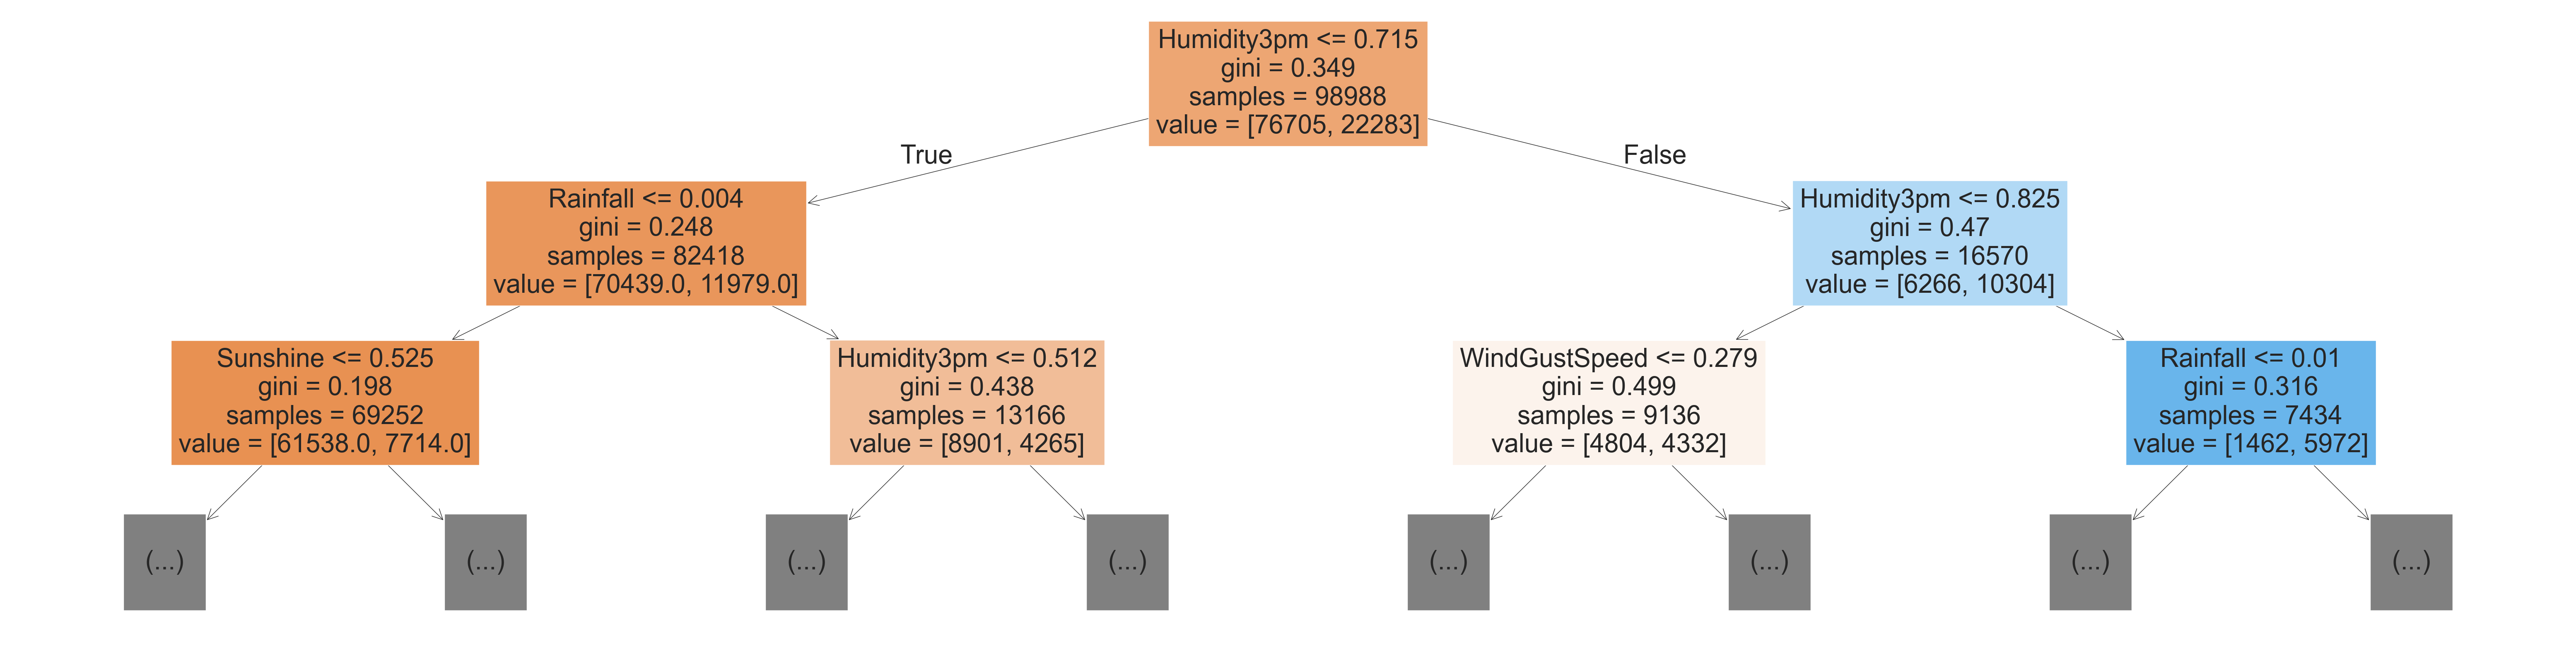

In [57]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names = x_train.columns, max_depth = 2, filled = True);

In [58]:
model.tree_.max_depth

49

In [59]:
tree_text = export_text(model, max_depth=10, feature_names=list(x_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- Cloud9am <= 0.61
|   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |--- Sunshine <= 0.41
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- Sunshine >  0.41
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.33
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- MinTemp >  0.33
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.51
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  

In [61]:
model.feature_importances_

array([0.0517289 , 0.04827607, 0.06785345, 0.0350833 , 0.06171954,
       0.06510195, 0.0413171 , 0.0415716 , 0.05257636, 0.26850778,
       0.0512326 , 0.07713791, 0.01968553, 0.02381602, 0.04826022,
       0.04613167, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [64]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.268508
11,Pressure3pm,0.077138
2,Rainfall,0.067853
5,WindGustSpeed,0.065102
4,Sunshine,0.061720
8,Humidity9am,0.052576
0,MinTemp,0.051729
10,Pressure9am,0.051233
1,MaxTemp,0.048276
14,Temp9am,0.048260


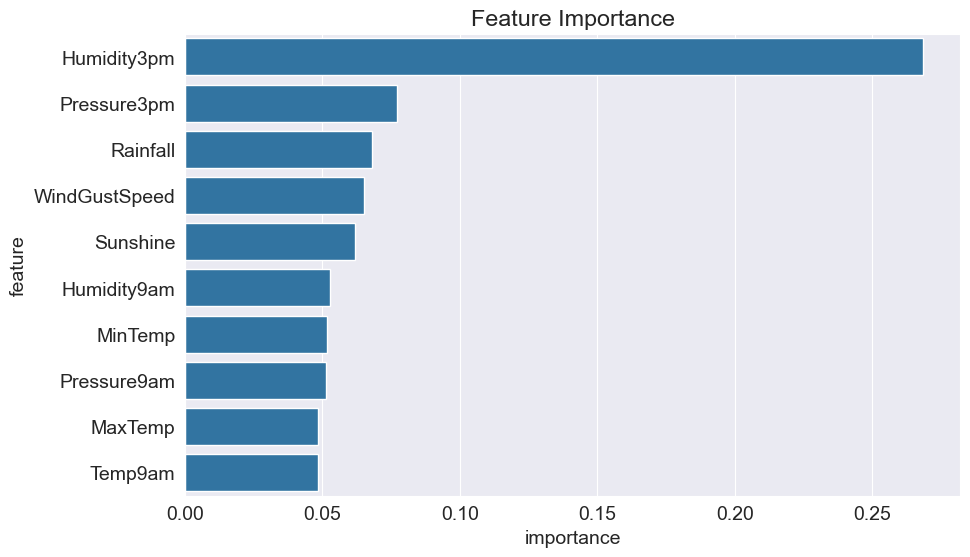

In [65]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

In [66]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [67]:
model.fit(x_train, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
model.score(x_train, train_targets)

0.8291308037337859

In [69]:
model.score(x_validation, validation_targets)

0.8334397307178921

In [70]:
model.classes_

array(['No', 'Yes'], dtype=object)

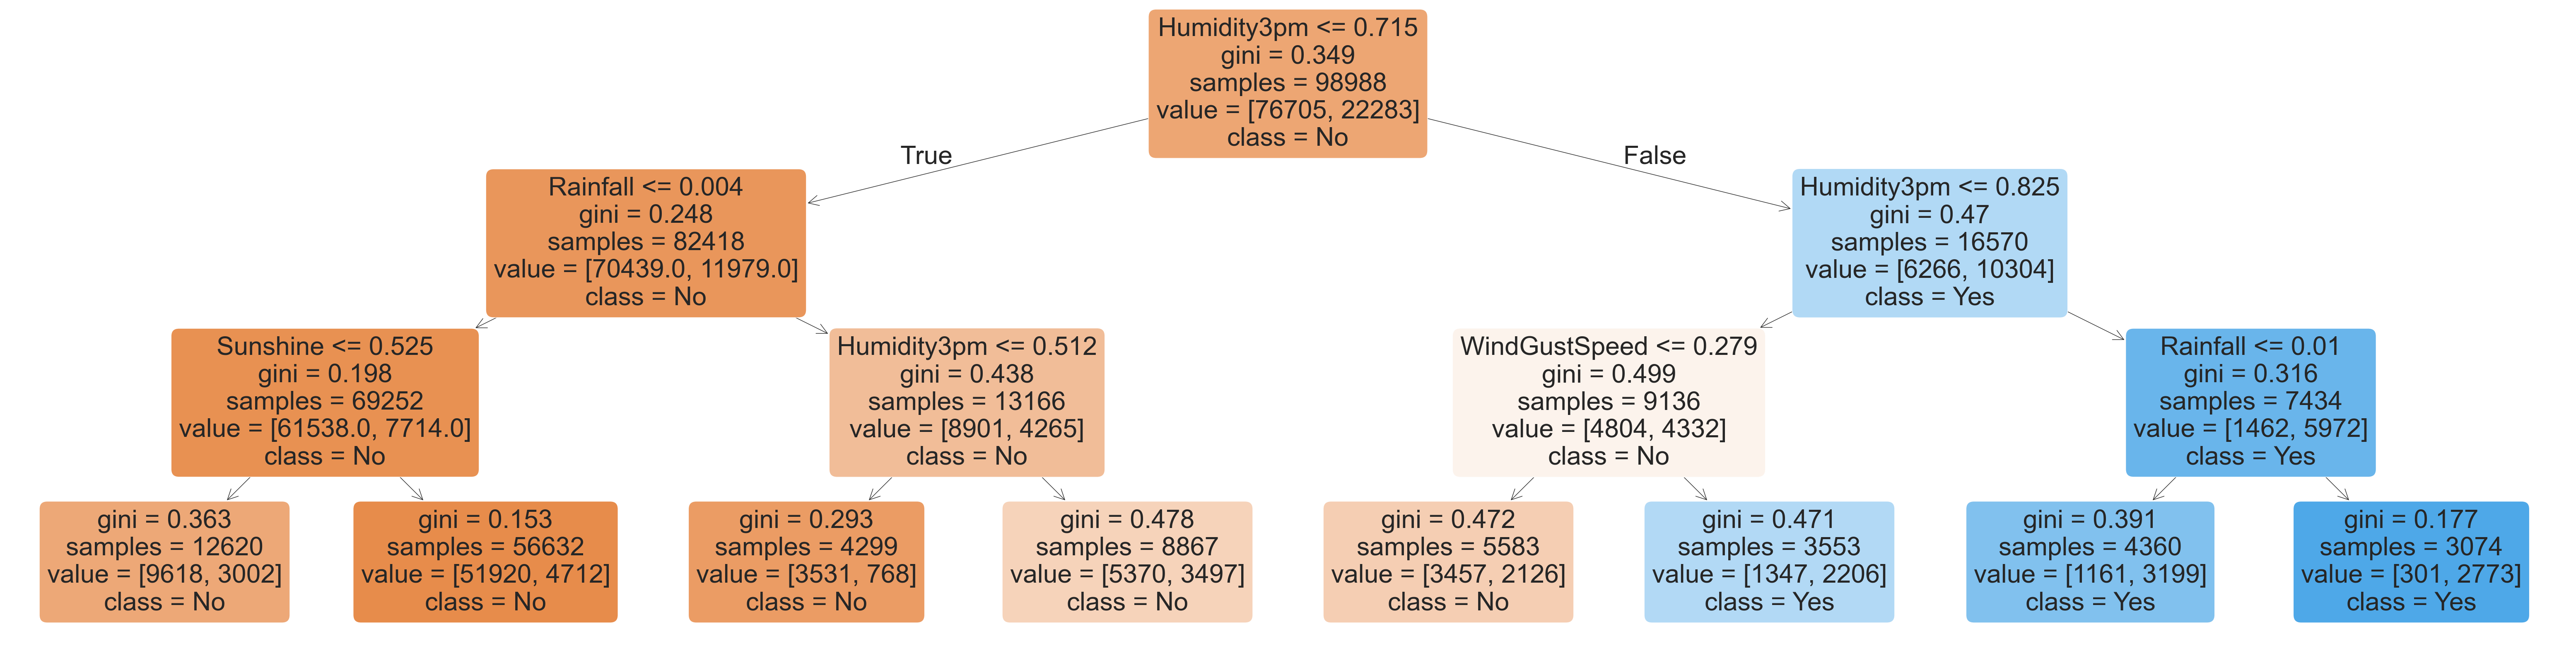

In [71]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [72]:
print(export_text(model, feature_names=list(x_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [73]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth = md, random_state = 42)
    model.fit(x_train, train_targets)
    train_error = 1 - model.score(x_train, train_targets)
    validation_error = 1 - model.score(x_validation, validation_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': validation_error}

In [76]:
%%time
error_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 15.2 s
Wall time: 15.3 s


In [77]:
error_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160615,0.159132
5,6,0.156413,0.157739
6,7,0.152877,0.155592
7,8,0.147321,0.157681
8,9,0.142048,0.156578
9,10,0.135198,0.159132


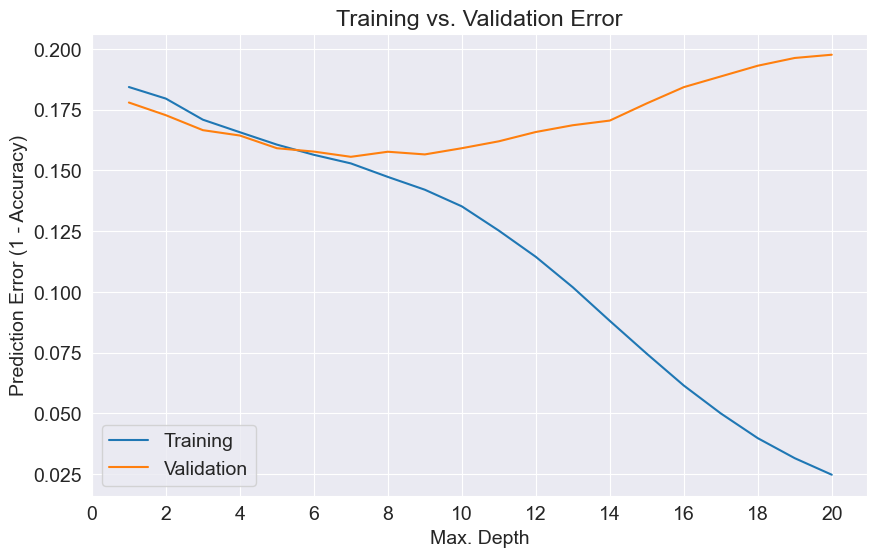

In [79]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [80]:
model = DecisionTreeClassifier(max_depth = 7, random_state = 42).fit(x_train, train_targets)
model.score(x_validation, validation_targets)

0.8444083338169578

In [82]:
model = DecisionTreeClassifier(max_leaf_nodes = 128, random_state = 48)

In [83]:
model.fit(x_train, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,48
,max_leaf_nodes,128
,min_impurity_decrease,0.0
,class_weight,None


In [84]:
model.score(x_train, train_targets)

0.8495070109508224

In [85]:
model.score(x_validation, validation_targets)

0.8442922639428936

In [88]:
model.tree_.max_depth

11

In [89]:
model_text = export_text(model, feature_names=list(x_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- Humidity3pm >  0.57
|   |   |   |   |   |   |   |   |   |--- MaxTemp <= 0.53
|   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- MaxTemp >  0.53
|   |   |   |   |   |   |   |   |   |   |--- Temp3pm <= 0.67
|   |   |   |   |   |   |

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
model = RandomForestClassifier(n_jobs = -1, random_state = 42)

In [92]:
%%time
model.fit(x_train, train_targets)

CPU times: total: 43.2 s
Wall time: 4.77 s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [93]:
model.score(x_train, train_targets)

0.9999595910615429

In [95]:
model.score(x_validation, validation_targets)

0.8522430503162904

In [96]:
train_probability = model.predict_proba(x_train)
train_probability

array([[0.98, 0.02],
       [0.98, 0.02],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02]], shape=(98988, 2))

In [98]:
len(model.estimators_)

100

In [99]:
model.estimators_[0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,1608637542
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


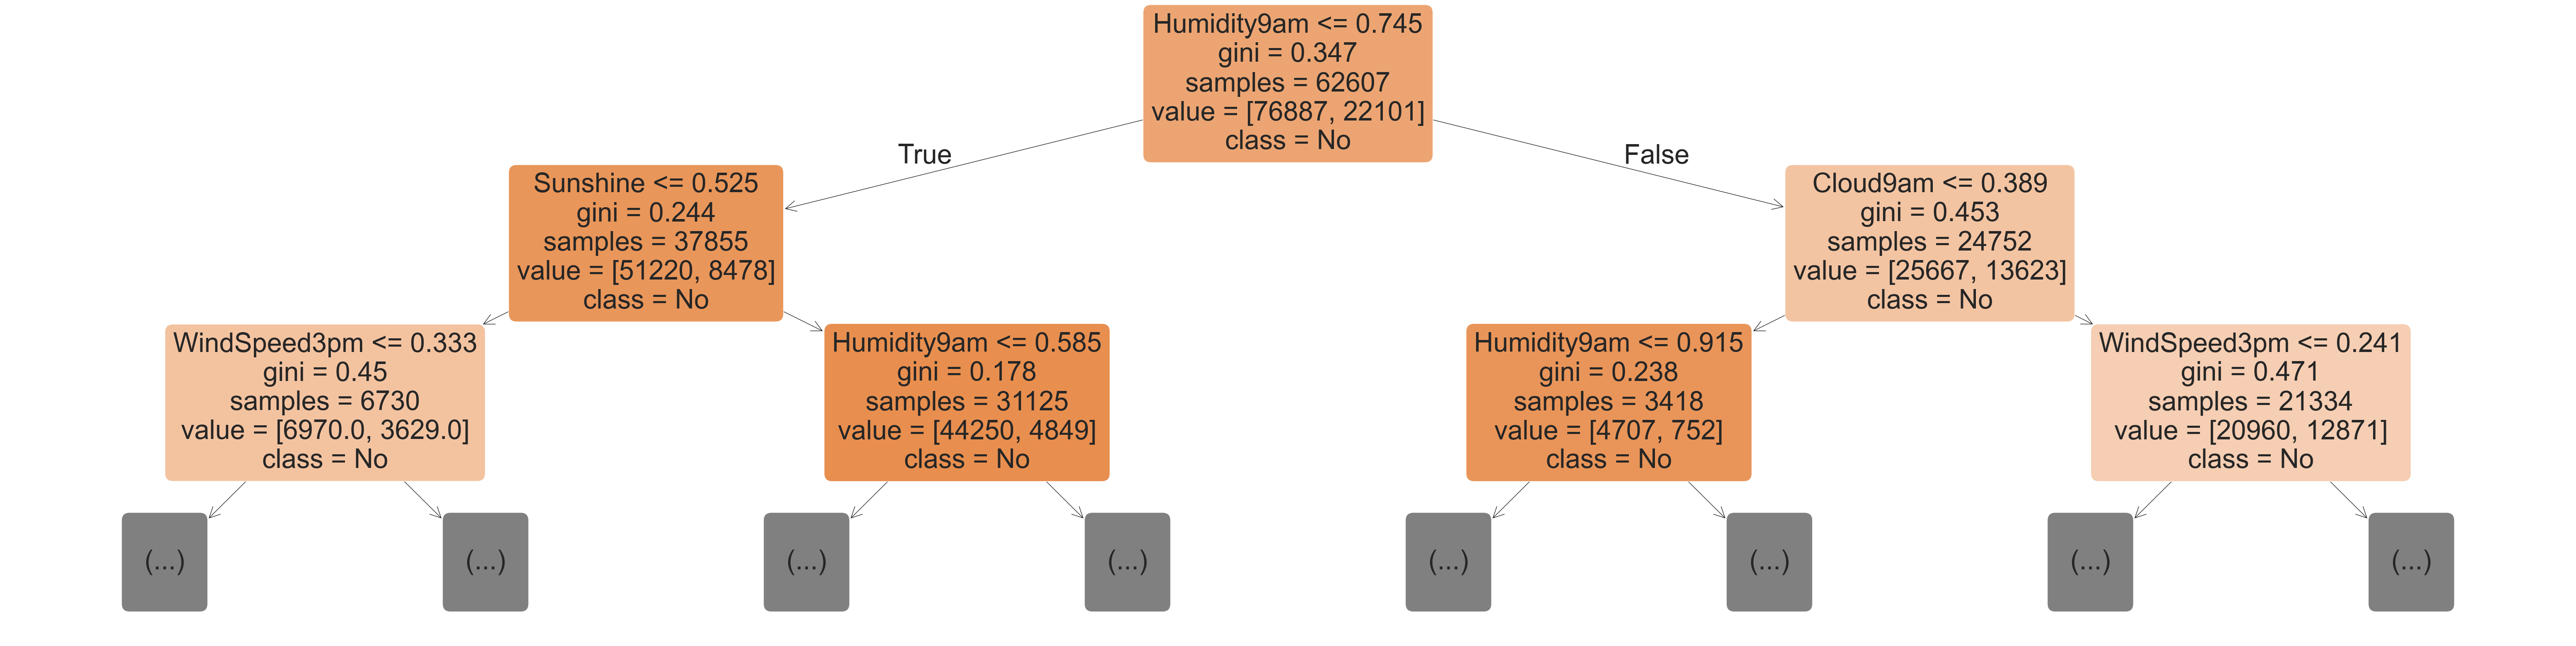

In [100]:
plt.figure(figsize = (80,20))
plot_tree(model.estimators_[0], max_depth = 2, feature_names = x_train.columns, filled = True, rounded = True, class_names = model.classes_);

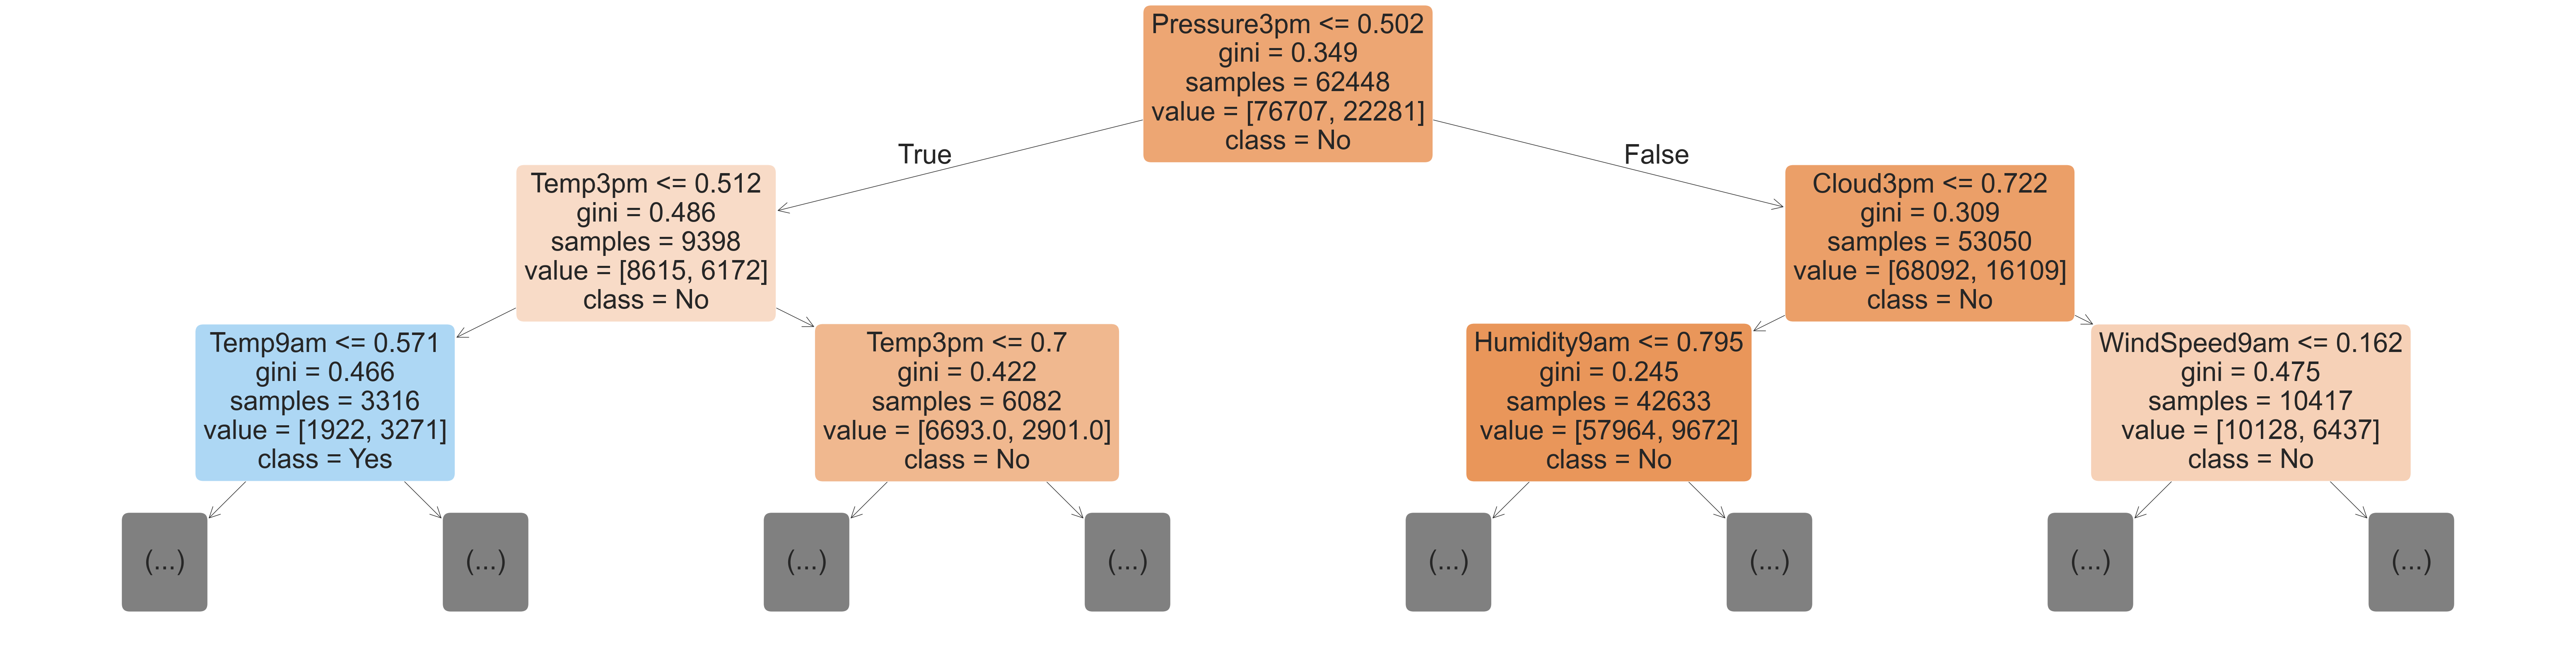

In [101]:
plt.figure(figsize = (80,20))
plot_tree(model.estimators_[15], max_depth = 2, feature_names=x_train.columns, filled = True, rounded = True, class_names = model.classes_);

In [102]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

In [103]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.155702
11,Pressure3pm,0.072524
4,Sunshine,0.069159
2,Rainfall,0.066721
8,Humidity9am,0.066394
10,Pressure9am,0.065564
5,WindGustSpeed,0.062690
15,Temp3pm,0.062561
0,MinTemp,0.060467
1,MaxTemp,0.060237


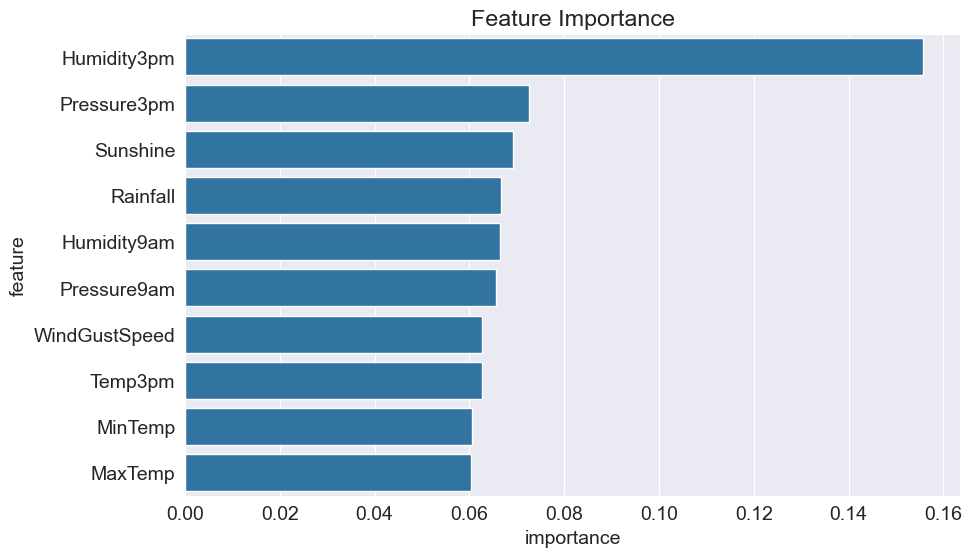

In [104]:
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), x = 'importance', y = 'feature');

## Hyperparameter Tuning with Random Forests

In [105]:
base_model = RandomForestClassifier(random_state = 42, n_jobs = -1).fit(x_train, train_targets)

In [106]:
base_train_accuracy = base_model.score(x_train, train_targets)
base_validation_accuracy = base_model.score(x_validation, validation_targets)

In [107]:
base_accuracy = base_train_accuracy, base_validation_accuracy
base_accuracy

(0.9999595910615429, 0.8522430503162904)

In [108]:
model = RandomForestClassifier(random_state = 42, n_jobs = -1, n_estimators = 10)

In [109]:
model.fit(x_train, train_targets)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [110]:
model.score(x_train, train_targets), model.score(x_validation, validation_targets)

(0.9868468905321858, 0.842667285705995)

In [111]:
base_accuracy

(0.9999595910615429, 0.8522430503162904)

In [112]:
model = RandomForestClassifier(random_state = 42, n_jobs = -1, n_estimators = 500)
model.fit(x_train, train_targets)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [113]:
model.score(x_train, train_targets), model.score(x_validation, validation_targets)

(0.9999797955307714, 0.8539840984272532)

In [117]:
def test_paramaters(**params):
    model = RandomForestClassifier(random_state = 42, n_jobs = -1, **params).fit(x_train, train_targets)
    return model.score(x_train, train_targets), model.score(x_validation, validation_targets)

In [118]:
test_paramaters(max_depth = 5, max_leaf_nodes = 1024, n_estimators = 1000)

(0.8248474562573241, 0.8262433985259126)

In [119]:
test_paramaters(max_depth = 5)

(0.8250899098880672, 0.8261853635888805)

In [120]:
test_paramaters(max_depth = 26)

(0.9944033620236796, 0.8506180720793918)

In [121]:
test_paramaters(max_leaf_nodes = 2**5)

(0.8339293651755768, 0.8350066740177587)

In [122]:
test_paramaters(max_leaf_nodes = 2**20)

(0.9999393865923142, 0.853868028553189)

In [123]:
base_accuracy

(0.9999595910615429, 0.8522430503162904)

In [127]:
test_paramaters(max_features = "log2")

(0.9999494888269285, 0.8512564563867449)

In [128]:
test_paramaters(max_features = 3)

(0.9999595910615429, 0.8513144913237769)

In [129]:
test_paramaters(max_features = 6)

(0.9999494888269285, 0.8512564563867449)

In [130]:
base_accuracy

(0.9999595910615429, 0.8522430503162904)

In [134]:
test_paramaters(min_samples_split = 3, min_samples_leaf = 2)

(0.9667838525881925, 0.8542742731124137)

In [137]:
test_paramaters(min_samples_split = 100, min_samples_leaf = 60)

(0.8521740008889966, 0.8467877662352736)

In [136]:
base_accuracy

(0.9999595910615429, 0.8522430503162904)

In [138]:
test_paramaters(min_impurity_decrease = 1e-7)

(0.9996161150846568, 0.8521850153792583)

In [139]:
test_paramaters(min_impurity_decrease = 1e-2)

(0.774891906089627, 0.7882885497069235)

In [140]:
test_paramaters(bootstrap = False)

(0.9999797955307714, 0.8532876791828681)

In [141]:
test_paramaters(max_samples = 0.9)

(0.9997373419000283, 0.8526492948755151)

In [142]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [143]:
test_paramaters(class_weight = "balanced")

(0.9999494888269285, 0.8510823515756485)

In [144]:
test_paramaters(class_weight = {"No": 1, "Yes": 2})

(0.9999393865923142, 0.8518368057570658)

In [145]:
base_accuracy

(0.9999595910615429, 0.8522430503162904)

In [146]:
model = RandomForestClassifier(n_jobs = -1, 
                               random_state = 42, 
                               n_estimators = 500,
                               max_features = 7,
                               max_depth = 30, 
                               class_weight = {'No': 1, 'Yes': 1.5})

In [147]:
model.fit(x_train, train_targets)

,n_estimators,500
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [148]:
model.score(x_train, train_targets), model.score(x_validation, validation_targets)

(0.9993837636885279, 0.8512564563867449)

In [150]:
base_accuracy

(0.9999595910615429, 0.8522430503162904)

In [151]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [153]:
model.score(x_test, test_targets)

0.841957341957342

In [155]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_columns] = imputer.transform(input_df[numeric_columns])
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])
    input_df[encoded_columns] = encoder.transform(input_df[categorical_columns])
    x_input = input_df[numeric_columns + encoded_columns]
    prediction = model.predict(x_input)[0]
    probability = model.predict_proba(x_input)[0][list(model.classes_).index(prediction)]
    return prediction, probability